## Import necessary libraries from sklearn


In [24]:
# Import necessary libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import numpy as np # For Math
import pandas as pd # Pandas for DataSet

## Loading the Data and Creating the DataFrame

In [2]:
data=pd.read_csv('spam.csv') # Convert data to Pandas DataFrame.
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Preprocessing

In [3]:
data.info() # Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Drop Duplicates

In [4]:
data.duplicated().sum() # See the sum of duplicates in Data.

415

In [5]:
data.drop_duplicates() # Droping duplicates.

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Handle Missing Values

In [6]:
data.isna().sum() # Searching for nulls in Data.

Category    0
Message     0
dtype: int64

## Create a pie chart illustrating the proportion of spam within the Dataset


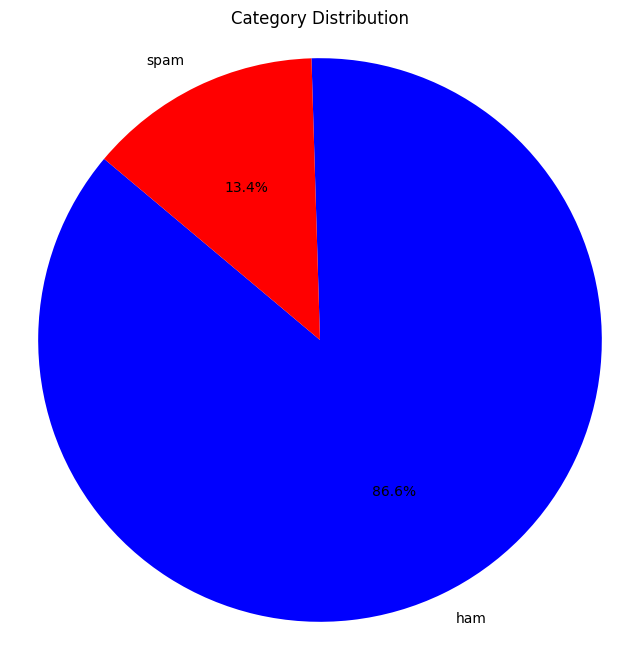

In [29]:
import matplotlib.pyplot as plt

# Calculate the distribution of categories
category_counts = data['Category'].value_counts()

# Define colors for the pie chart
colors = ['blue', 'Red']

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=['ham', 'spam'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Category Distribution')
plt.axis('equal')
plt.show()

## Label Encoding

In [7]:
data['Category']=data['Category'].apply(lambda x:1 if x=='spam' else 0) # Label Encoding for Category to 0 (ham),1 (spam).
data.head(5) # Showing first 5 Rows.

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Splitting Data

In [10]:
# Splitting the dataset into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(data.Message, data.Category, test_size=0.30)

## Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian)
Here I use Multinominal Bayes Because here data in a discrete form
discrete data

In [11]:
# Create a pipeline to streamline the transformation and classification process
clf = Pipeline([
    # Step 1: Convert the text data into numerical format using CountVectorizer
    ('vectorizer', CountVectorizer()),

    # Step 2: Apply the Multinomial Naive Bayes classifier to the vectorized data
    ('nb', MultinomialNB())
])

# Tarining The Model

In [12]:
clf.fit(X_train,y_train) ## Training the model

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [14]:
test=clf.predict(X_test) # Predicting using test data

# Prediction Of Model

In [26]:
y_pred=pd.DataFrame(test) # Creating Data frame

In [27]:
y_pred.value_counts() # checking Value count

0    1209
1     184
Name: count, dtype: int64

## the dataset is highly imbalanced
 accuracy might be high due to the majority class, but the F1 score will give you a better sense of how well the model is performing with respect to both precision and recall.

In [28]:
# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Model F1 Score = {f1 * 100:.2f}%")

Model F1 Score = 98.33%
